### Import Libaries

In [1]:
import pandas as pd 
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox

In [2]:
df = pd.read_csv('C:/Users/60004501/Documents/Lagos_Rent_Prediction_Proj/eda_data.csv')
df.head()

,price,num_bedrooms,num_bathrooms,num_toilet,location,property_type
0,5000000,4,4,5,ikeja gra,4 BEDROOM TERRACED DUPLEX HOUSE FOR RENT IKEJA...
1,7500000,3,3,3,old ikoyi,3 BEDROOM FLAT
2,7500000,2,2,2,banana island,2 BEDROOM FLAT
3,9500000,3,3,3,banana island,3 BEDROOM FLAT
4,20000000,6,6,6,old ikoyi,6 BEDROOM PENTHOUSE FLAT


In [3]:
df['location'] = df['location'].apply(lambda x: x.replace(',','').replace('.',''))

In [4]:
df.location.unique()

array(['ikeja gra', 'old ikoyi', 'banana island', 'victoria island',
       'ahmadu bello', 'off adeola', 'off kingsway', 'bourdillon old',
       'ikoyi lagos', 'lekki phase', 'ikate lekki', 'eko atlantic',
       'off alexander', 'adeola odeku', 'bourdillon ikoyi',
       'chevron lekki', 'lekki county', 'oniru victoria',
       'ikate elegushi', 'toyin street', 'allen avenue', 'agungi lekki',
       'osapa london', 'ajah lagos', 'platinum estate', 'off ifako',
       'osborne foreshore', 'parkview estate', 'millenuim ups',
       'medina gbagada', 'arowojobe estate', 'soluyi gbagada',
       'anthony village', 'thomas estate', 'ogudu orike',
       'mende maryland', 'magodo gra', 'very decent', 'harmony estate',
       'adeniyi jones', 'lekki scheme', 'off freedom', 'admiralty way',
       'idado lekki', 'ologolo lekki', 'bera estate', 'ifako gbagada',
       'palace road', '2nd toll', ' ikoyi', ' victoria', 'amuwo odofin',
       'divine estate', 'ikeja lagos', 'off palace', 'ikota

Text(0, 0.5, 'Count')

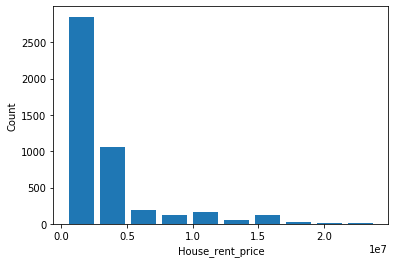

In [5]:
plt.hist(df.price,rwidth=0.8)
plt.xlabel("House_rent_price")
plt.ylabel("Count")

In [6]:
df.num_bathrooms.unique()

array([ 4,  3,  2,  6,  5,  1,  0,  7, 10,  9,  8], dtype=int64)

Text(0, 0.5, 'Count')

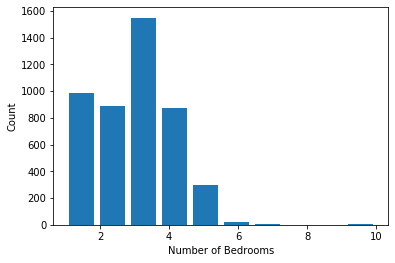

In [7]:
plt.hist(df.num_bedrooms,rwidth=0.8)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

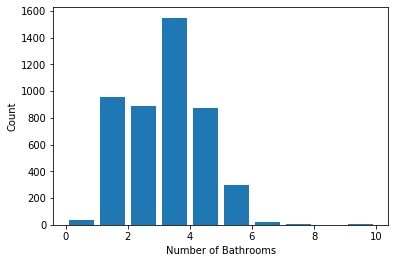

In [8]:
plt.hist(df.num_bathrooms,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

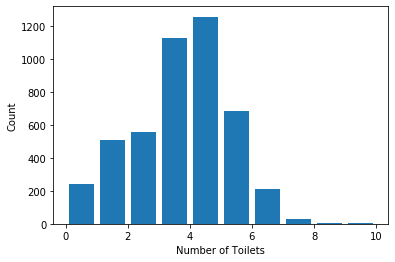

In [9]:
plt.hist(df.num_toilet,rwidth=0.8)
plt.xlabel("Number of Toilets")
plt.ylabel("Count")

In [10]:
dummies = pd.get_dummies(df.location)
dummies.head(4)

,badore,ikoyi,lekki,old,victoria,2nd toll,abraham adesanya,abule egba,abule ijesha,abule oja,...,toyin street,unilag estate,unique estate,unity estate,valley view,very decent,vgc lekki,victoria island,westend estate,yaba lagos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df2 = pd.concat([df,dummies], axis = 1)

In [12]:
df3 = df2.drop(['location','property_type','very decent'], axis = 'columns')
df3.head()

,price,num_bedrooms,num_bathrooms,num_toilet,badore,ikoyi,lekki,old,victoria,2nd toll,...,thomas estate,toyin street,unilag estate,unique estate,unity estate,valley view,vgc lekki,victoria island,westend estate,yaba lagos
0,5000000,4,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500000,3,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7500000,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9500000,3,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000000,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df4 = df3.copy()
df4.head()

,price,num_bedrooms,num_bathrooms,num_toilet,badore,ikoyi,lekki,old,victoria,2nd toll,...,thomas estate,toyin street,unilag estate,unique estate,unity estate,valley view,vgc lekki,victoria island,westend estate,yaba lagos
0,5000000,4,4,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7500000,3,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7500000,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9500000,3,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000000,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [15]:
X = df3.drop('price',axis = 'columns')
X.head()

,num_bedrooms,num_bathrooms,num_toilet,badore,ikoyi,lekki,old,victoria,2nd toll,abraham adesanya,...,thomas estate,toyin street,unilag estate,unique estate,unity estate,valley view,vgc lekki,victoria island,westend estate,yaba lagos
0,4,4,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,6,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df3.price
y.head()

0     5000000
1     7500000
2     7500000
3     9500000
4    20000000
Name: price, dtype: int64

In [17]:
# Trying the Stats Model 
import statsmodels.api as sm

In [18]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     82.47
Date:                Tue, 21 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:23:20   Log-Likelihood:                -72873.
No. Observations:                4625   AIC:                         1.462e+05
Df Residuals:                    4402   BIC:                         1.476e+05
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.204e+06   5.79e+05     -3.805      0.000   -3.34e+06   -1.07e+06
num_bedrooms         1.269e+06   4.09e+05      3.104      0.002    4.68e+05    2.07e+06
num_bathrooms       -1.566e+05   4.06e+05     -0.386      0.700   -9.53e+05     6.4e+05
num_toilet          -6.939e+04   3.79e+04     -1.833      0.067   -1.44e+05    4818.105
 badore              1.069e+06   8.88e+05      1.205      0.228   -6.71e+05    2.81e+06
 ikoyi               1.579e+07   7.94e+05     19.892      0.000    1.42e+07    1.73e+07
 lekki               3.475e+06   7.21e+05      4.822      0.000    2.06e+06    4.89e+06
 old                 9.364e+06   9.11e+05     10.275      0.000    7.58e+06    1.12e+07
 victoria            1.406e+07   1.15e+06     12.206      0.000    1.18e+07    1.63e+07
2nd toll             1.629e+06   9.11e+05      1.789      0.074   -1.57e+05    3.42e+06
abraham adesanya      1.31e+05   9.11e+05      0.144      0.886   -1.65e+06    1.92e+06
abule egba           6.177e+05   1.15e+06      0.536      0.592   -1.64e+06    2.88e+06
abule ijesha          1.26e+06   7.62e+05      1.653      0.098   -2.34e+05    2.75e+06
abule oja              1.5e+06   8.41e+05      1.784      0.074   -1.48e+05    3.15e+06
adekunle yaba         1.19e+06   6.99e+05      1.703      0.089    -1.8e+05    2.56e+06
ademola adetokunbo   5.655e+06    9.1e+05      6.211      0.000    3.87e+06    7.44e+06
adeniran ogunsanya   2.426e+06   9.64e+05      2.517      0.012    5.37e+05    4.32e+06
adeniyi jones        1.981e+06   6.17e+05      3.209      0.001    7.71e+05    3.19e+06
adeola odeku         8.016e+06   8.15e+05      9.837      0.000    6.42e+06    9.61e+06
admiralty homes      1.719e+06   9.11e+05      1.887      0.059   -6.73e+04    3.51e+06
admiralty way        4.979e+06   9.11e+05      5.464      0.000    3.19e+06    6.77e+06
ado ajah             9.102e+05   6.62e+05      1.375      0.169   -3.88e+05    2.21e+06
ado road             8.923e+05    9.1e+05      0.980      0.327   -8.93e+05    2.68e+06
ago palace           6.409e+05    6.2e+05      1.033      0.302   -5.76e+05    1.86e+06
aguda surulere        9.66e+05   6.99e+05      1.382      0.167   -4.04e+05    2.34e+06
aguda(ogba) ogba     7.531e+05   7.28e+05      1.034      0.301   -6.75e+05    2.18e+06
agungi agungi        2.044e+06   7.62e+05      2.682      0.007     5.5e+05    3.54e+06
agungi lekki         1.467e+06   6.44e+05      2.278      0.023    2.04e+05    2.73e+06
ahmadu bello         1.306e+07   9.64e+05     13.546      0.000    1.12e+07    1.49e+07
ajah lagos           8.344e+05   7.05e+05      1.183      0.237   -5.48e+05    2.22e+06
ajao estate          4.084e+05   5.98e+05      0.683      0.495   -7.64e+05    1.58e+06
ajayi road           7.573e+05   7.29e+05      1.039      0.299   -6.71e+05    2.19e+06
ako

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=10)

In [21]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7850283635817248

In [ ]:
# Having a score of 78%, Normalizing our dependent variable (Price) will improve our model

Text(0, 0.5, 'Count')

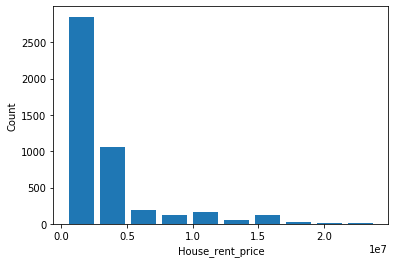

In [22]:
plt.hist(y,rwidth=0.8)
plt.xlabel("House_rent_price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

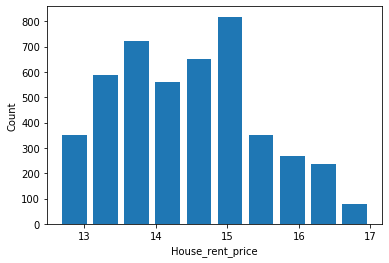

In [23]:
y = boxcox(y,0)
plt.hist(y,rwidth=0.8)
plt.xlabel("House_rent_price")
plt.ylabel("Count")

In [24]:
# Re-evaluating our model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=10)

In [25]:
#Improves our Model from 78% to 85%
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8563338506610505

In [26]:
#Cross validating our model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.86607254, 0.88452966, 0.86803434, 0.8528412 , 0.85958292,
       0.86111792, 0.8754902 , 0.87546406, 0.88563533, 0.87085855])

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algorithms = {'linear_regression':
                  {'model': LinearRegression(), 
                   'params':
                   {'normalize':[True, False]
                 }},
                  'lasso':{'model': Lasso(), 
                    'params':{'alpha':[1,2], 'selection': ['random','cyclic']
                 }},
                  'decision_tree':{'model':DecisionTreeRegressor(),
                    'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']
                 }}
                 }
    scores =[]
    cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    for algo_name, config in algorithms.items():
        gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':algo_name,
                      'best_score':gs.best_score_,
                      'best_params': gs.best_params_
                      })
    return pd.DataFrame(scores,columns =['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.869963,{'normalize': False}
1,lasso,-0.001832,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.758786,"{'criterion': 'mse', 'splitter': 'random'}"


In [28]:
from scipy.special import boxcox, inv_boxcox #Returns predicted value to its original value

In [29]:
def predict_price(location,num_bedrooms,num_toilet,num_bathrooms):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0]= num_bedrooms
    x[1] = num_toilet
    x[2] = num_bathrooms
    if loc_index >= 0:
        x[loc_index] = 1
        y = lr_clf.predict([x])
    
    return np.round(inv_boxcox(y,0),2)


In [30]:
#Test our Trainned Model

In [33]:
predict_price('ikate lekki',3,3,3)[0]

2188845.19

# Model Deployment

- Deploying our model into production

In [34]:
#exporting your data into a pickle file
import pickle
with open ('Lagos_home_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [35]:
#Importing into a jason file
import json
columns = {'data_columns': [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

### Writing a python flask Server which can serve HTTP request made from the UI
 - The python flask script would be used to as our back end Application